In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! pip install seaborn
import seaborn as sns
from fbprophet import Prophet
import calendar
! pip install pycaret
from pycaret.regression import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 102kB 4.5MB/s 
     |████████████████████████████████| 7.0MB 3.9MB/s 
     |████████████████████████████████| 3.0MB 43.3MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 389kB 46.6MB/s 
     |████████████████████████████████| 1.6MB 40.3MB/s 
     |████████████████████████████████| 133kB 49.3MB/s 
     |████████████████████████████████| 63.9MB 113kB/s 
     |████████████████████████████████| 266kB 49.1MB/s 
     |████████████████████████████████| 1.2MB 47.0MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 2.1MB 47.2MB/s 
     |████████████████████████████████| 6.2MB 43.2MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 552kB 49.2MB/s 
     |████████████████████████████████| 614kB 42.3MB/s 
 

In [0]:
train = pd.read_csv("drive/My Drive/JanataHack-TimeSeries/train_6BJx641.csv")
test = pd.read_csv("drive/My Drive/JanataHack-TimeSeries/test_pavJagI.csv")
sample_submission = pd.read_csv("drive/My Drive/JanataHack-TimeSeries/sample_submission_bYgKb77.csv")

In [0]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [0]:
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [0]:
train.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [0]:
test.isnull().sum()

ID             0
datetime       0
temperature    0
var1           0
pressure       0
windspeed      0
var2           0
dtype: int64

## Exploratory data analysis

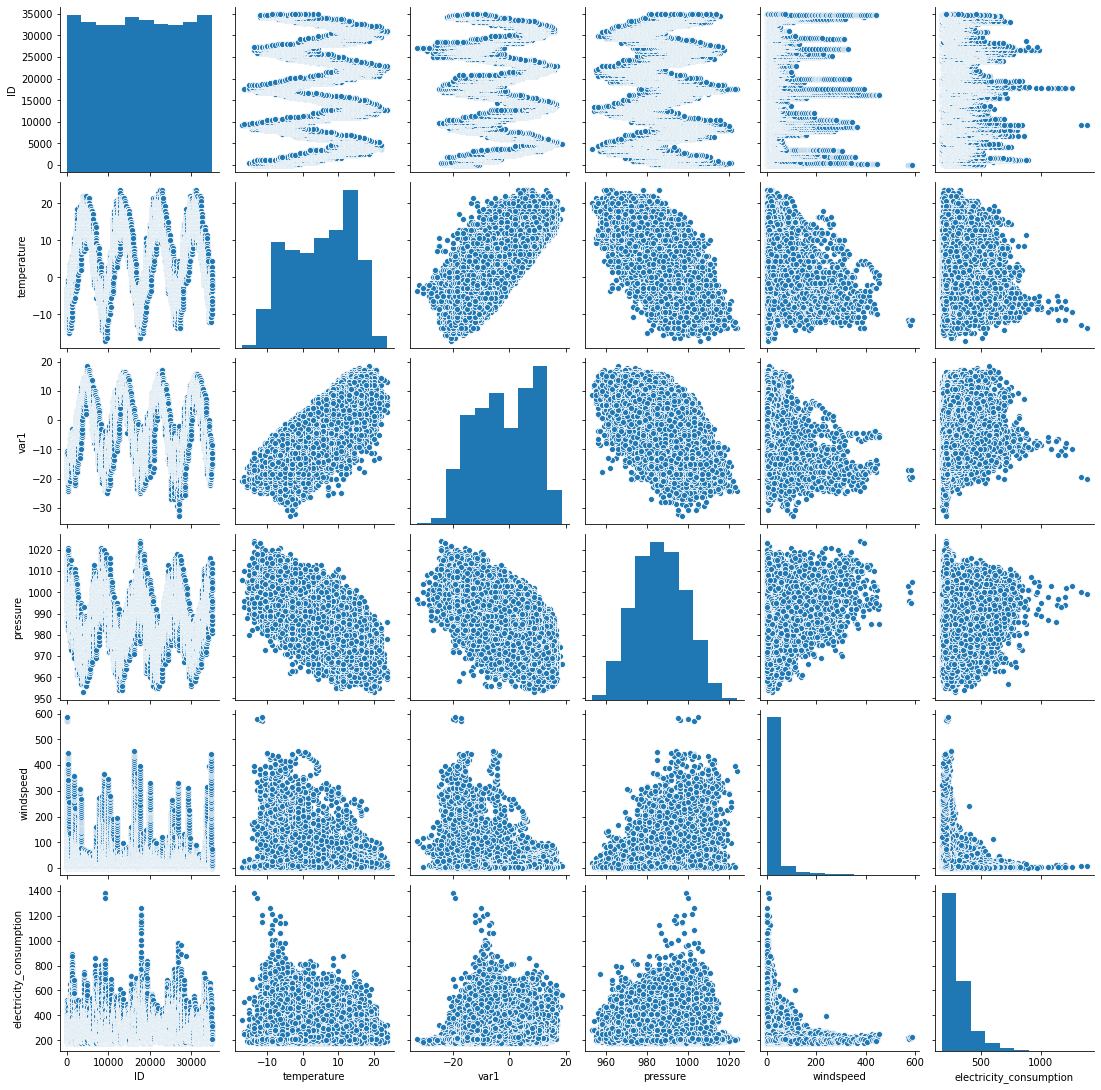

In [0]:
sns.pairplot(train)
plt.show()

## Initial try for quick results - FB prophet

In [0]:
df_train = train[['datetime','electricity_consumption']]

In [0]:
df_train.rename(columns={"datetime":"ds","electricity_consumption":"y"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_train['datetime_object'] = pd.to_datetime(df_train['ds'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_train['month'] = df_train['datetime_object'].apply(lambda x: x.month)
df_train['year'] = df_train['datetime_object'].apply(lambda x: x.year)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_train['Month_Year'] = df_train['month'].astype(str)+"_"+df_train['year'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_train.head()

,ds,y,datetime_object,month,year,Month_Year
0,2013-07-01 00:00:00,216.0,2013-07-01 00:00:00,7,2013,7_2013
1,2013-07-01 01:00:00,210.0,2013-07-01 01:00:00,7,2013,7_2013
2,2013-07-01 02:00:00,225.0,2013-07-01 02:00:00,7,2013,7_2013
3,2013-07-01 03:00:00,216.0,2013-07-01 03:00:00,7,2013,7_2013
4,2013-07-01 04:00:00,222.0,2013-07-01 04:00:00,7,2013,7_2013


In [0]:
df_train.isnull().sum()

ds                 0
y                  0
datetime_object    0
month              0
year               0
Month_Year         0
dtype: int64

In [0]:
Month_year = df_train['Month_Year'].unique()

In [0]:
def prophet_model(df,month,year):
  m = Prophet()
  m.fit(df)
  last_day_of_month = calendar.monthrange(year,month)[1]
  missing_days = last_day_of_month - 23
  period = missing_days * 24
  future = m.make_future_dataframe(freq='H',periods=period,include_history = False)
  forecasts = m.predict(future)
  return forecasts

In [0]:
test_df = []
for month_year in Month_year:
  my = month_year.split(sep="_")
  month = int(my[0])
  year = int(my[1])
  df = df_train[((df_train['month'] == month) & (df_train['year'] == year))][['ds','y']]
  test_df.append(prophet_model(df,month,year))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

In [0]:
mytest = pd.concat(test_df)

In [0]:
mytest.shape

(8568, 19)

In [0]:
test.shape

(8568, 7)

In [0]:
mytest.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-24 00:00:00,240.798001,202.290856,333.895981,240.798001,240.798001,28.279163,28.279163,28.279163,20.091778,20.091778,20.091778,8.187384,8.187384,8.187384,0.0,0.0,0.0,269.077164
1,2013-07-24 01:00:00,240.876003,200.294365,338.496311,240.876003,240.876003,28.701389,28.701389,28.701389,16.339439,16.339439,16.339439,12.361950,12.361950,12.361950,0.0,0.0,0.0,269.577392
2,2013-07-24 02:00:00,240.954004,203.199620,334.088924,240.954004,240.954004,26.488464,26.488464,26.488464,10.025568,10.025568,10.025568,16.462896,16.462896,16.462896,0.0,0.0,0.0,267.442468
3,2013-07-24 03:00:00,241.032006,203.588489,331.072822,241.032006,241.032006,23.454109,23.454109,23.454109,3.001313,3.001313,3.001313,20.452796,20.452796,20.452796,0.0,0.0,0.0,264.486115
4,2013-07-24 04:00:00,241.110007,197.795947,325.754315,241.110007,241.110007,21.568878,21.568878,21.568878,-2.726285,-2.726285,-2.726285,24.295163,24.295163,24.295163,0.0,0.0,0.0,262.678886


In [0]:
test_dataframe = mytest[['ds','yhat']]
test_dataframe.rename(columns={'yhat':'electricity_consumption'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
test['date'] = pd.to_datetime(test['datetime'])

In [0]:
merged_df = pd.merge(test,test_dataframe,how='inner',left_on = "date", right_on = "ds")

In [0]:
merged_df.sort_values(by="ID",inplace=True)

In [0]:
submission = merged_df[['ID','electricity_consumption']]
submission.to_csv("prophet_model_initial.csv",index=False)

In [0]:
submission.shape

(8568, 2)

In [0]:
## The above result RMSE is 140 baseline score

## Pycaret models

In [0]:
## What we will do is create some features for timestamp. Once it is done, then we will go ahead in creating some more features
## and then ultimately end up in creating a model

In [0]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [0]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [0]:
## time features
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayname'] = train['datetime'].dt.day_name()

test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayname'] = test['datetime'].dt.day_name()

In [0]:
train['isWeekday'] = 0
test['isWeekday'] = 0
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [0]:
train.loc[train['dayname'].isin(weekdays),"isWeekday"] = 1
test.loc[test['dayname'].isin(weekdays),"isWeekday"] = 1

In [0]:
train['isWeekday'].value_counts()

1    18960
0     7536
Name: isWeekday, dtype: int64

In [0]:
grouped_train = train.groupby(by="hour")['electricity_consumption'].mean().reset_index()

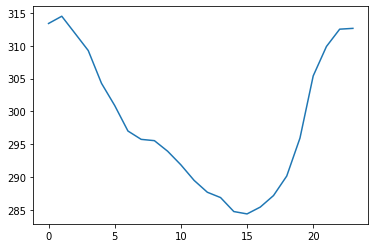

In [0]:
grouped_train['electricity_consumption'].plot()
plt.show()

# office hours there is a decrease because more people wont be there
# office hours less consumptions

In [0]:
grouped_train_month = train.groupby(by="month")['electricity_consumption'].mean().reset_index()

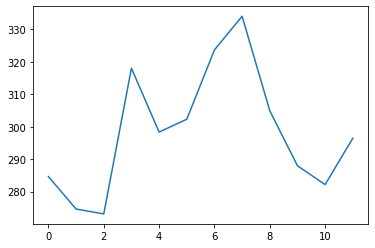

In [0]:
grouped_train_month['electricity_consumption'].plot()
plt.show()

In [0]:
## assuming 9-6 is office hours 
office_hours = [i for i in range(9,19)]
train['isOfficeHours'] = 0
test['isOfficeHours'] = 0
train.loc[train['hour'].isin(office_hours),"isOfficeHours"] = 1
test.loc[test['hour'].isin(office_hours),"isOfficeHours"] = 1

In [0]:
## make weekend is office hour to 0
train.loc[train['isWeekday'] == 0,'isOfficeHours'] = 0
test.loc[test['isWeekday'] == 0,'isOfficeHours'] = 0

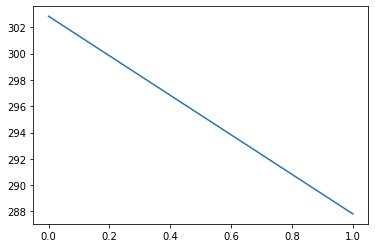

In [0]:
grouped_train_office = train.groupby(by="isOfficeHours")['electricity_consumption'].mean().reset_index()
grouped_train_office['electricity_consumption'].plot()
plt.show()

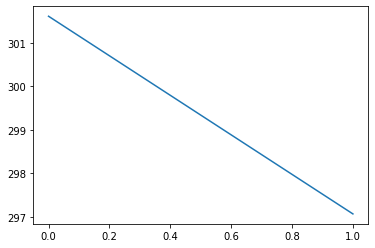

In [0]:
grouped_train_weekday = train.groupby(by="isWeekday")['electricity_consumption'].mean().reset_index()
grouped_train_weekday['electricity_consumption'].plot()
plt.show()

In [0]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,month,year,day,hour,dayname,isWeekday,isOfficeHours
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,7,2013,1,0,Monday,1,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,7,2013,1,1,Monday,1,0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,7,2013,1,2,Monday,1,0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,7,2013,1,3,Monday,1,0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,7,2013,1,4,Monday,1,0


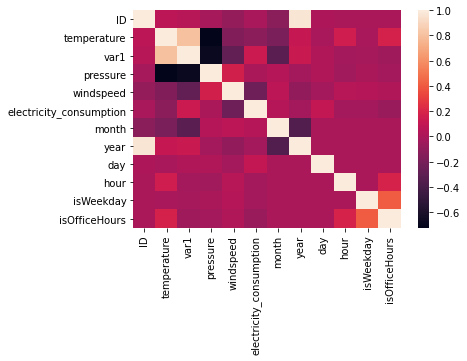

In [0]:
corr = train.corr()
sns.heatmap(corr)
plt.show()

In [0]:
training_set = train.drop(columns = "ID")

In [0]:
reg = setup(data = training_set,target="electricity_consumption")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8960
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(26496, 14)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
# compare_models()

In [0]:
et = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,34.0423,2662.3610,51.5981,0.7864,0.1476,0.1115
1,36.1222,2826.6798,53.1665,0.7392,0.1585,0.1193
2,34.9826,2688.4433,51.8502,0.7629,0.1514,0.1149
3,34.6444,2636.0764,51.3427,0.7761,0.1494,0.1136
4,33.1370,2411.4056,49.1061,0.7964,0.1448,0.1104
5,33.1558,2327.1132,48.2402,0.7838,0.1462,0.1101
6,31.3500,2108.8951,45.9227,0.7952,0.1397,0.1071
7,35.8984,3045.7318,55.1881,0.7639,0.1559,0.1167
8,33.6040,2632.5746,51.3086,0.7543,0.1475,0.1131
9,36.4445,3084.6905,55.5400,0.7318,0.1587,0.1159


In [0]:
test_set = test.drop(columns = "ID")
y_pred = predict_model(et,data= test_set)

In [0]:
final = pd.merge(test,y_pred,left_on="datetime",right_on = "datetime")
submission = final[['ID','Label']]
submission.rename(columns={"Label":"electricity_consumption"},inplace=True)
submission.sort_values(by="ID",inplace=True)
submission.to_csv("pycaret_submission.csv",index=False)

In [0]:
test.shape

(8568, 15)

In [0]:
submission.shape

(8568, 2)

In [0]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,41.0667,3668.8935,60.5714,0.7056,0.1727,0.1356
1,42.0118,3687.3691,60.7237,0.6598,0.1815,0.1407
2,40.0270,3328.0676,57.6894,0.7064,0.1708,0.1332
3,39.1999,3192.3209,56.5006,0.7288,0.1675,0.1306
4,38.5961,3232.9717,56.8592,0.7271,0.1645,0.1279
5,40.6023,3464.1508,58.8570,0.6782,0.1749,0.1350
6,37.6001,2751.5914,52.4556,0.7328,0.1623,0.1288
7,41.5216,3697.6043,60.8079,0.7134,0.1757,0.1372
8,39.4550,3459.6617,58.8189,0.6772,0.1683,0.1325
9,41.9409,3589.9459,59.9162,0.6879,0.1750,0.1352


In [0]:
test_set = test.drop(columns = "ID")
y_pred = predict_model(rf,data= test_set)

In [0]:
final = pd.merge(test,y_pred,left_on="datetime",right_on = "datetime")
submission = final[['ID','Label']]
submission.rename(columns={"Label":"electricity_consumption"},inplace=True)
submission.sort_values(by="ID",inplace=True)
submission.to_csv("pycaret_submission_random_forest.csv",index=False)

In [0]:
test.shape

(8568, 15)

In [0]:
submission.shape

(8568, 2)

In [0]:
# stacked = stack_models([et,rf])

In [0]:
# test_set = test.drop(columns = "ID")
# y_pred = predict_model(stacked,data= test_set)

In [0]:
# final = pd.merge(test,y_pred,left_on="datetime",right_on = "datetime")
# submission = final[['ID','Label']]
# submission.rename(columns={"Label":"electricity_consumption"},inplace=True)
# submission.sort_values(by="ID",inplace=True)
# submission.to_csv("pycaret_submission_stacked.csv",index=False)

## Another approach

In [0]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [0]:
df = train.set_index('datetime')

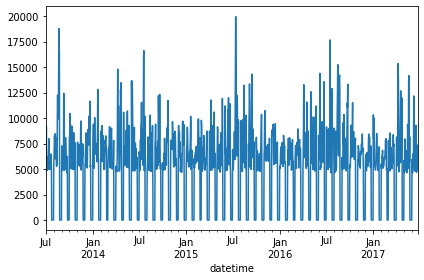

In [0]:
temp = df.resample('D').sum()
temp['electricity_consumption'].plot()
plt.tight_layout()
plt.show()

In [0]:
def combine_data():
  train['is_train'] = 1
  test['is_train'] = 0
  combined = pd.concat([train,test],axis=0)
  return combined

In [0]:
df = combine_data()

In [0]:
import re
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: 
      df.drop(fldname, axis=1, inplace=True)

In [0]:
add_datepart(df,'datetime', False)

In [0]:
df['datetimedayname'] = df['datetime'].dt.day_name()

In [0]:
df['datetimehour'] = df['datetime'].dt.hour

## converting boolean to int

In [0]:
BOOL_COL = df.select_dtypes('bool').columns
df[BOOL_COL] = df[BOOL_COL].astype('int')

In [0]:
df['var1_press_ratio'] = df['pressure']/df['var1']
df['var1_temp_ratio'] = df['temperature']/df['var1']
df['var1_windspeed_ratio'] = df['windspeed']/df['var1']

In [0]:
df['var1_var2'] = df.groupby(['datetimeYear','datetimeMonth','datetimeDay','var2'])['var1'].transform('sum')

## added features

In [0]:
df['isWeekday'] = 0
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [0]:
df.loc[df['datetimedayname'].isin(weekdays),"isWeekday"] = 1


In [0]:
## assuming 9-6 is office hours 
office_hours = [i for i in range(9,19)]
df['isOfficeHours'] = 0
df.loc[df['datetimehour'].isin(office_hours),"isOfficeHours"] = 1

In [0]:
## make weekend is office hour to 0
df.loc[df['isWeekday'] == 0,'isOfficeHours'] = 0

In [0]:
df['datetime_interval'] = pd.cut(df['datetimehour'], bins=4, labels=False)

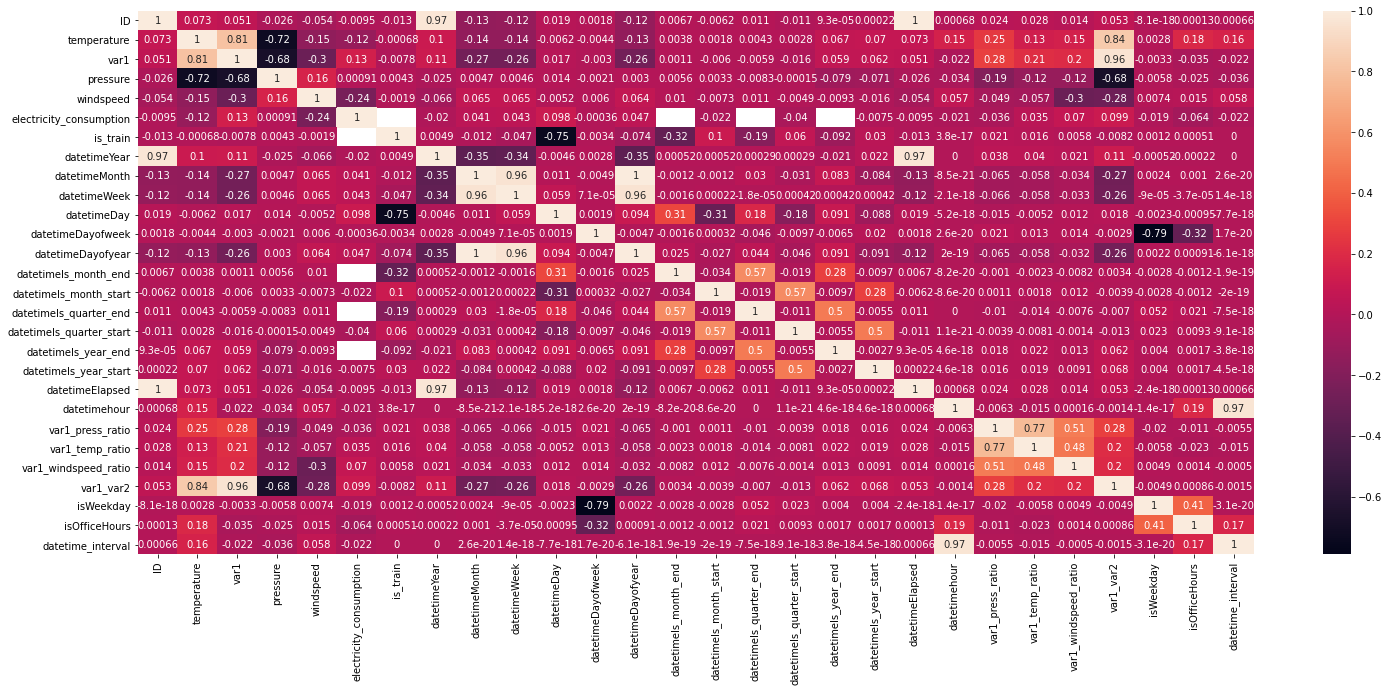

In [0]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## lags and other features

In [0]:
df['date'] = df['datetime'].dt.date

In [0]:
day_df = df.groupby(['date']).agg({'temperature':'mean',\
                          'pressure':'mean',\
                          'var1':'mean',\
                          'windspeed':'mean',\
                          'var2':'nunique',\
                          'electricity_consumption':['sum','mean']}).reset_index()

In [0]:
day_df.columns = ['_'.join(x) if len(x)>1 else x[0] for x in day_df.columns ]

In [0]:
day_df['day'] = pd.to_datetime(day_df['date_']).dt.day
day_df['month'] = pd.to_datetime(day_df['date_']).dt.month
day_df['year'] = pd.to_datetime(day_df['date_']).dt.year

## Rolling mean of target variable

In [0]:
day_df['lag_1'] = day_df.groupby(['month','year'])['electricity_consumption_mean'].shift(1)

In [0]:
day_df.head()

,date_,temperature_mean,pressure_mean,var1_mean,windspeed_mean,var2_nunique,electricity_consumption_sum,electricity_consumption_mean,day,month,year,lag_1
0,2013-07-01,-8.741667,1003.208333,-17.016667,150.613750,1,5136.0,214.000,1,7,2013,NaN
1,2013-07-02,-7.566667,1006.375000,-15.687500,10.603125,1,5502.0,229.250,2,7,2013,214.000
2,2013-07-03,-8.091667,1000.416667,-13.845833,2.790208,1,9141.0,380.875,3,7,2013,229.250
3,2013-07-04,-7.679167,996.916667,-14.233333,17.119792,1,7104.0,296.000,4,7,2013,380.875
4,2013-07-05,-7.500000,1001.916667,-17.654167,178.988333,1,4953.0,206.375,5,7,2013,296.000


In [0]:
day_df['dt_date'] = pd.to_datetime(day_df['date_'])

In [0]:
day_df.sort_values(by=['dt_date'], inplace=True)

In [0]:
LAG_COL = []
for i in range(2,23):
  col_name = 'lag_'+str(i)
  temp = day_df.groupby(['month','year'])['electricity_consumption_mean'].\
                      rolling(window =i, min_periods=1).mean().reset_index()
  temp.sort_values(by=['year','month'], inplace=True)
  temp['new_mean'] = temp.groupby(['month','year'])['electricity_consumption_mean'].shift(1)
  temp = temp.set_index('level_2')
  day_df[col_name] = temp['new_mean']
  LAG_COL.append(col_name)

In [0]:
req_merge = day_df[['temperature_mean', 'pressure_mean', 'var1_mean',
       'windspeed_mean', 'var2_nunique', 'electricity_consumption_mean', 
       'day', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22','date_']]

In [0]:
df1 = pd.merge(df, req_merge, left_on = ['date'], right_on=['date_'])

In [0]:
df1['press_ratio'] = df1['pressure']/df1['pressure_mean']
df1['temp_ratio'] = df1['temperature']/df1['temperature_mean']
df1['wins_ratio'] = df1['windspeed']/df1['windspeed_mean']
df1['var1_ratio'] = df1['var1']/df1['var1_mean']

In [0]:
df2 = df1.copy()

In [0]:

df2.drop(['datetime','date','date_','electricity_consumption_mean','day','month','year'], axis=1, inplace=True)

In [0]:
df2.columns

Index(['ID', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption', 'is_train', 'datetimeYear', 'datetimeMonth',
       'datetimeWeek', 'datetimeDay', 'datetimeDayofweek', 'datetimeDayofyear',
       'datetimeIs_month_end', 'datetimeIs_month_start',
       'datetimeIs_quarter_end', 'datetimeIs_quarter_start',
       'datetimeIs_year_end', 'datetimeIs_year_start', 'datetimeElapsed',
       'datetimehour', 'var1_press_ratio', 'var1_temp_ratio',
       'var1_windspeed_ratio', 'var1_var2', 'isWeekday', 'datetimedayname',
       'isOfficeHours', 'datetime_interval', 'temperature_mean',
       'pressure_mean', 'var1_mean', 'windspeed_mean', 'var2_nunique', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',
       'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16',
       'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22',
       'press_ratio', 'temp_ratio', 'wins_ratio', 'var1_ratio'],
      dty

In [0]:
df2['datetimeDay'] = np.sin(df2['datetimeDay'])
df2['datetimeDayofweek']= np.sin(df2['datetimeDayofweek'])
df2['datetimeMonth'] = np.sin(df2['datetimeMonth'])
df2['datetimeDayofyear'] = np.sin(df2['datetimeDayofyear'])
df2['datetimehour'] = np.sin(df2['datetimehour'])
df2['datetimeWeek'] = np.sin(df2['datetimeWeek'])

In [0]:
CAT_COL = ['var2','datetimeYear','datetime_interval','var2_nunique']
LOG_COL = ['windspeed','windspeed_mean', 'pressure', 'pressure_mean']
MIN_MAX_COL = ['datetimeElapsed','var1_press_ratio','var1_windspeed_ratio',\
               'var1_var2','temperature','temperature_mean','var1','var1_mean']


In [0]:
df2[LOG_COL] = np.log(df2[LOG_COL])
df2[LAG_COL] = np.log(df2[LAG_COL])

In [0]:
df2.replace({np.inf:0,-np.inf:0}, inplace=True)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[MIN_MAX_COL] = scaler.fit_transform(df2[MIN_MAX_COL])


In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['var2'] = le.fit_transform(df2['var2'])

# Pycaret

In [0]:
train1 = df2[df2['is_train']==1]
test1 = df2[df2['is_train']==0]

In [0]:
exp_reg = setup(data = train1, target = 'electricity_consumption', train_size =0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8842
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(26496, 61)"
4,Missing Values,True
5,Numeric Features,46
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
lgbm = create_model('lightgbm', fold = 5, round = 2)
rf = create_model('rf', fold = 5, round = 2)
et = create_model('et', fold = 5, round = 2)
cat = create_model('catboost', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,36.44,2665.01,51.62,0.77,0.15,0.12
1,37.27,3085.95,55.55,0.76,0.16,0.12
2,36.33,2619.68,51.18,0.78,0.15,0.12
3,36.55,2656.37,51.54,0.78,0.15,0.12
4,35.44,2549.09,50.49,0.78,0.15,0.12
Mean,36.41,2715.22,52.08,0.77,0.15,0.12
SD,0.58,189.82,1.78,0.01,0.00,0.00


In [0]:
stack_1 = stack_models([rf,cat,lgbm], meta_model = et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26.9729,1698.9660,41.2185,0.8488,0.1239,0.0909
1,26.8146,1692.0222,41.1342,0.8612,0.1208,0.0873
2,26.5611,1951.0878,44.1711,0.8498,0.1221,0.0876
3,26.9702,1952.1692,44.1834,0.8435,0.1231,0.0875
4,26.1397,1854.0721,43.0589,0.8410,0.1195,0.0873
5,26.8171,1649.7605,40.6172,0.8652,0.1198,0.0880
6,26.4681,1703.1334,41.2690,0.8598,0.1192,0.0863
7,27.0361,1726.4116,41.5501,0.8593,0.1240,0.0885
8,26.2774,1935.7918,43.9976,0.8382,0.1190,0.0864
9,25.6837,1486.4474,38.5545,0.8673,0.1194,0.0873


In [0]:
final_model = finalize_model(stack_1)

IntProgress(value=0, description='Processing: ', max=17)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:18:11
Status,. . . . . . . . . . . . . . . . . .,Evaluating CatBoostRegressor
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


KeyboardInterrupt: ignored

In [0]:
unseen_predictions = predict_model(stack_1, data=test1, round=0)


In [0]:
unseen_predictions[['ID','Label']].rename(columns={'Label':'electricity_consumption'}).to_csv('pycaret.csv', index=False)

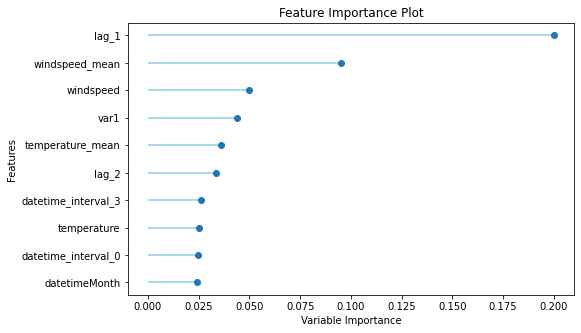

In [0]:
plot_model(et, plot= 'feature')

SystemExit: ignored

# Stacking

In [0]:
train1 = df2[df2['is_train']==1]
test1 = df2[df2['is_train']==0]

In [0]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)

In [0]:
train2 = train1.drop(['electricity_consumption','is_train'], axis=1)
test2 = test1.drop(['electricity_consumption','is_train'], axis=1)

In [0]:
back_col = test2.columns

In [0]:
train2.drop(columns="datetimedayname",inplace=True)
test2.drop(columns="datetimedayname",inplace=True)

In [0]:
train2 = pd.DataFrame(imp_mean.fit_transform(train2), columns = train2.columns)

In [0]:
test2 = pd.DataFrame(imp_mean.transform(test2), columns = back_col)

In [0]:
train2['electricity_consumption'] = train1['electricity_consumption']

In [0]:
print(train2.columns)
print(test2.columns)

Index(['ID', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'datetimeYear', 'datetimeMonth', 'datetimeWeek', 'datetimeDay',
       'datetimeDayofweek', 'datetimeDayofyear', 'datetimeIs_month_end',
       'datetimeIs_month_start', 'datetimeIs_quarter_end',
       'datetimeIs_quarter_start', 'datetimeIs_year_end',
       'datetimeIs_year_start', 'datetimeElapsed', 'datetimehour',
       'var1_press_ratio', 'var1_temp_ratio', 'var1_windspeed_ratio',
       'var1_var2', 'isWeekday', 'isOfficeHours', 'datetime_interval',
       'temperature_mean', 'pressure_mean', 'var1_mean', 'windspeed_mean',
       'var2_nunique', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13',
       'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20',
       'lag_21', 'lag_22', 'press_ratio', 'temp_ratio', 'wins_ratio',
       'var1_ratio', 'electricity_consumption'],
      dtype='object')
Index(['ID', 'temp

In [0]:
! pip install pyforest
import pyforest
# from sklearn.feature_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train2.drop(['electricity_consumption'], axis=1), train2['electricity_consumption'], 
                                                    test_size=0.2, random_state=0)

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=bb3b4d6ca4af5bdff6169a89e4f9b7a400c26bf97f7be4aea7748a7b75ef76a6
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


<IPython.core.display.Javascript object>